In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os, os.path
import keras
import time as timer
import scipy.misc
import scipy.ndimage

from keras.models import load_model

from tqdm import tqdm
from datetime import datetime

from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

from datetime import datetime
from uncertainties import ufloat, unumpy
from uncertainties.umath import *

from PIL import Image

Using Theano backend.


In [2]:
# resolution of images

h = 75
w = 100

# Timing analysis

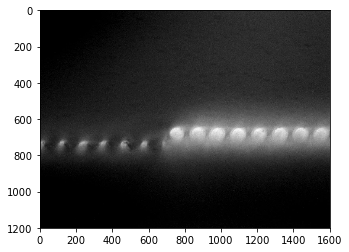

In [11]:
img = np.array(Image.open('../../../WindingImages/2017-09-10/IMG_2017-09-10_15-55-30.jpg'))
plt.imshow(img, cmap='gray')

In [4]:
means = np.loadtxt('../Means.txt')
stds = np.loadtxt('../StdDev.txt')

In [86]:
names = ['169_167_163_200_200_selu_100epochs',
        '167_165_163_200_200_selu_100epochs',
        '167_163_200_200_selu_100epochs_retrained',
        '169_167_200_200_selu_100epochs_retrained']
new = '167_165_163_200_selu_100epochs'

names.append(new)

In [12]:
f = open('../Data/Timing/Timing_75_100_{:}.txt'.format(str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))), 'a')


model = load_model('../TrainedModels/2017-09-11/' + new + '.h5')

total_res = []
total_class = []

# Combine it!

for i in range(10000):
    # resize and re-shape
    t_start_resize = timer.time()
    img2 = scipy.misc.imresize(img, (h,w))
    # apply normalization
    img2 = (img2-means)/stds
    img2 = np.reshape(img2,[1,h,w,1])
    t_stop_resize = timer.time()

    dt1 = t_stop_resize - t_start_resize
    total_res.append(dt1)

    # classifying
    t_start_class = timer.time()
    Class = model.predict_classes(img2, verbose=0)
    t_stop_class = timer.time()

    dt2 = t_stop_class - t_start_class
    total_class.append(dt2)


total_res = np.array(total_res)
total_class = np.array(total_class)

print('Resizing and reshaping {}: {:.8f} +- {:.8f} sec'.format(new, total_res.mean(), total_res.std()))
print('Classification time {}: {:.8f} +- {:.8f} sec'.format(new, total_class.mean(), total_class.std()))

f.write('{}\t{:.8f}\t{:.8f}\t{:.8f}\t{:.8f}\n'.format(new, total_res.mean(), total_res.std(), total_class.mean(), total_class.std()))


f.close()

Resizing and reshaping 167_165_163_200_selu_100epochs: 0.00454954 +- 0.00003350 sec
Classification time 167_165_163_200_selu_100epochs: 0.00497834 +- 0.00356443 sec


In [87]:
names_short = ['169_167_163_200_200',
        '167_165_163_200_200',
        '167_163_200_200',
        '169_167_200_200',
        '167_165_163_200']

In [ ]:
f = open('../Data/Misc/Timing/Timing_75_100_{:}.txt'.format(str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))), 'a')

for i, n in enumerate(names):
    
    
    if i <= 1:
        model = load_model('../TrainedModels/2017-09-10/' + n + '.h5')
    else:
        model = load_model('../TrainedModels/2017-09-09/' + n + '.h5')
    
    total_res = []
    total_class = []

    # Combine it!

    for i in range(10000):
        # resize and re-shape
        t_start_resize = timer.time()
        img2 = scipy.misc.imresize(img, (h,w))
        # apply normalization
        img2 = (img2-means)/stds
        img2 = np.reshape(img2,[1,h,w,1])
        t_stop_resize = timer.time()

        dt1 = t_stop_resize - t_start_resize
        total_res.append(dt1)

        # classifying
        t_start_class = timer.time()
        Class = model.predict_classes(img2, verbose=0)
        t_stop_class = timer.time()

        dt2 = t_stop_class - t_start_class
        total_class.append(dt2)


    total_res = np.array(total_res)
    total_class = np.array(total_class)
    
    print('Resizing and reshaping {}: {:.8f} +- {:.8f} sec'.format(n, total_res.mean(), total_res.std()))
    print('Classification time {}: {:.8f} +- {:.8f} sec'.format(n, total_class.mean(), total_class.std()))

    f.write('{}\t{:.8f}\t{:.8f}\t{:.8f}\t{:.8f}\n'.format(n, total_res.mean(), total_res.std(), total_class.mean(), total_class.std()))


f.close()

### dark negative image

In [49]:
time_path = '../Data/Misc/Timing/Timing_75_100_darkneg.txt'

name = np.genfromtxt(time_path, unpack=True, usecols=[0], dtype=str)

res_darkneg, res_std_darkneg, clas_darkneg, clas_std_darkneg = np.genfromtxt(time_path, unpack=True, usecols=[1,2,3,4])

In [50]:
res_u_darkneg = unumpy.uarray(res_darkneg, res_std_darkneg)
class_u_darkneg = unumpy.uarray(clas_darkneg, res_std_darkneg)
total_u_darkneg = res_u_darkneg+class_u_darkneg

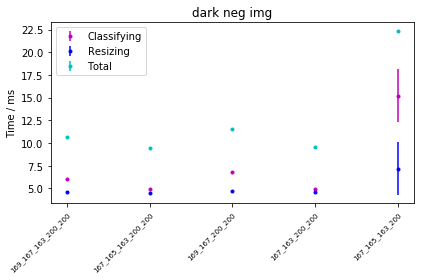

In [51]:
fig, ax = plt.subplots()

ax.errorbar(x=np.arange(len(clas_darkneg)), y=unumpy.nominal_values(class_u_darkneg)*1000, yerr=unumpy.std_devs(class_u_darkneg)*1000, color='m', marker='.', ls='', label='Classifying')
ax.errorbar(x=np.arange(len(res_darkneg)), y=unumpy.nominal_values(res_u_darkneg)*1000, yerr=unumpy.std_devs(res_u_darkneg)*1000, color='b', marker='.', ls='', label='Resizing')
ax.errorbar(x=np.arange(len(total_u_darkneg)), y=unumpy.nominal_values(total_u_darkneg)*1000, yerr=unumpy.std_devs(total_u_darkneg), color='c', marker='.', ls='', label='Total')

ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('dark neg img')

_ = plt.xticks(np.arange(len(names_short)), names_short, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

plt.tight_layout()
plt.savefig('../Data/Misc/Timing/Times_DarkNegImg.pdf')

### light negative image

In [52]:
time_path = '../Data/Misc/Timing/Timing_75_100_lightneg.txt'

name = np.genfromtxt(time_path, unpack=True, usecols=[0], dtype=str)

res_lightneg, res_std_lightneg, clas_lightneg, clas_std_lightneg = np.genfromtxt(time_path, unpack=True, usecols=[1,2,3,4])

In [53]:
res_u_lightneg = unumpy.uarray(res_lightneg, res_std_lightneg)
class_u_lightneg = unumpy.uarray(clas_lightneg, res_std_lightneg)
total_u_lightneg = res_u_lightneg+class_u_lightneg

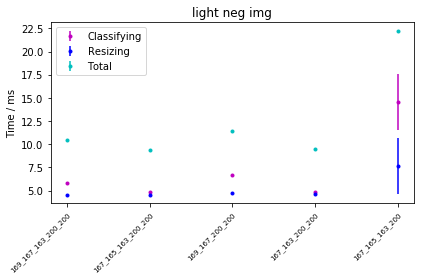

In [54]:
fig, ax = plt.subplots()

ax.errorbar(x=np.arange(len(clas_lightneg)), y=unumpy.nominal_values(class_u_lightneg)*1000, yerr=unumpy.std_devs(class_u_lightneg)*1000, color='m', marker='.', ls='', label='Classifying')
ax.errorbar(x=np.arange(len(res_lightneg)), y=unumpy.nominal_values(res_u_lightneg)*1000, yerr=unumpy.std_devs(res_u_lightneg)*1000, color='b', marker='.', ls='', label='Resizing')
ax.errorbar(x=np.arange(len(total_u_lightneg)), y=unumpy.nominal_values(total_u_lightneg)*1000, yerr=unumpy.std_devs(total_u_lightneg), color='c', marker='.', ls='', label='Total')

ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('light neg img')

_ = plt.xticks(np.arange(len(names_short)), names_short, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

plt.tight_layout()
plt.savefig('../Data/Misc/Timing/Times_LightNegImg.pdf')

### light positive image

In [55]:
time_path = '../Data/Misc/Timing/Timing_75_100_lightpos.txt'

name = np.genfromtxt(time_path, unpack=True, usecols=[0], dtype=str)

res_lightpos, res_std_lightpos, clas_lightpos, clas_std_lightpos = np.genfromtxt(time_path, unpack=True, usecols=[1,2,3,4])

In [56]:
res_u_lightpos = unumpy.uarray(res_lightpos, res_std_lightpos)
class_u_lightpos = unumpy.uarray(clas_lightpos, res_std_lightpos)
total_u_lightpos = res_u_lightpos+class_u_lightpos

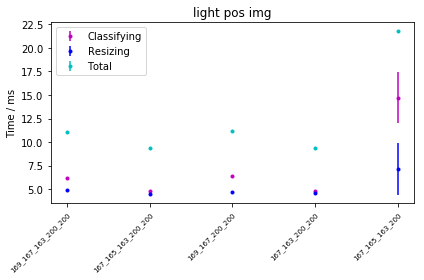

In [57]:
fig, ax = plt.subplots()

ax.errorbar(x=np.arange(len(clas_lightpos)), y=unumpy.nominal_values(class_u_lightpos)*1000, yerr=unumpy.std_devs(class_u_lightpos)*1000, color='m', marker='.', ls='', label='Classifying')
ax.errorbar(x=np.arange(len(res_lightpos)), y=unumpy.nominal_values(res_u_lightpos)*1000, yerr=unumpy.std_devs(res_u_lightpos)*1000, color='b', marker='.', ls='', label='Resizing')
ax.errorbar(x=np.arange(len(total_u_lightpos)), y=unumpy.nominal_values(total_u_lightpos)*1000, yerr=unumpy.std_devs(total_u_lightpos), color='c', marker='.', ls='', label='Total')

ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('light pos img')

_ = plt.xticks(np.arange(len(names_short)), names_short, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

plt.tight_layout()
plt.savefig('../Data/Misc/Timing/Times_LightPosImg.pdf')

### dark positive image

In [58]:
time_path = '../Data/Misc/Timing/Timing_75_100_darkpos.txt'

name = np.genfromtxt(time_path, unpack=True, usecols=[0], dtype=str)

res_darkpos, res_std_darkpos, clas_darkpos, clas_std_darkpos = np.genfromtxt(time_path, unpack=True, usecols=[1,2,3,4])

In [59]:
res_u_darkpos = unumpy.uarray(res_darkpos, res_std_darkpos)
class_u_darkpos = unumpy.uarray(clas_darkpos, res_std_darkpos)
total_u_darkpos = res_u_darkpos+class_u_darkpos

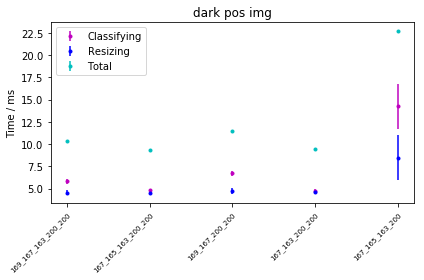

In [60]:
fig, ax = plt.subplots()

ax.errorbar(x=np.arange(len(clas_darkpos)), y=unumpy.nominal_values(class_u_darkpos)*1000, yerr=unumpy.std_devs(class_u_darkpos)*1000, color='m', marker='.', ls='', label='Classifying')
ax.errorbar(x=np.arange(len(res_darkpos)), y=unumpy.nominal_values(res_u_darkpos)*1000, yerr=unumpy.std_devs(res_u_darkpos)*1000, color='b', marker='.', ls='', label='Resizing')
ax.errorbar(x=np.arange(len(total_u_darkpos)), y=unumpy.nominal_values(total_u_darkpos)*1000, yerr=unumpy.std_devs(total_u_darkpos), color='c', marker='.', ls='', label='Total')

ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('dark pos img')

_ = plt.xticks(np.arange(len(names_short)), names_short, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

plt.tight_layout()
plt.savefig('../Data/Misc/Timing/Times_DarkPosImg.pdf')

### Total per Net for each img 

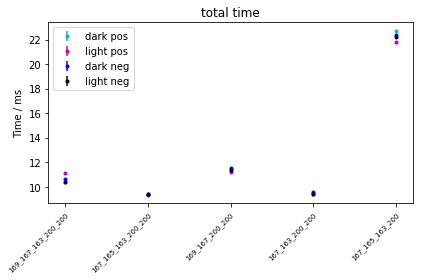

In [61]:
fig, ax = plt.subplots()

ax.errorbar(x=np.arange(len(total_u_darkpos)), y=unumpy.nominal_values(total_u_darkpos)*1000, yerr=unumpy.std_devs(total_u_darkpos), color='c', marker='.', ls='', label='dark pos')
ax.errorbar(x=np.arange(len(total_u_lightpos)), y=unumpy.nominal_values(total_u_lightpos)*1000, yerr=unumpy.std_devs(total_u_lightpos), color='m', marker='.', ls='', label='light pos')
ax.errorbar(x=np.arange(len(total_u_darkneg)), y=unumpy.nominal_values(total_u_darkneg)*1000, yerr=unumpy.std_devs(total_u_darkneg), color='b', marker='.', ls='', label='dark neg')
ax.errorbar(x=np.arange(len(total_u_lightneg)), y=unumpy.nominal_values(total_u_lightneg)*1000, yerr=unumpy.std_devs(total_u_lightneg), color='k', marker='.', ls='', label='light neg')


ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('total time')

_ = plt.xticks(np.arange(len(names_short)), names_short, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

plt.tight_layout()
plt.savefig('../Data/Misc/Timing/Times_Total_allImg.pdf')

# Score distribution for models on all data (normalized)

In [62]:
# Load test data:

#Creates list of positiv files
positiv_list = glob.glob('/fhgfs/groups/e5/lhcb/detector/scifi/windingcontrol/Images_Sep17/pos/IMG_*.png')
#Finds the number of positiv files
positiv_len = len(positiv_list)
print("Size of positiv Sample: {}".format(positiv_len))

#Same but for negativ files
negativ_list = glob.glob('/fhgfs/groups/e5/lhcb/detector/scifi/windingcontrol/Images_Sep17/neg/IMG_*.png')
negativ_len = len(negativ_list)
print("Size of negativ Sample: {}".format(negativ_len))


X_pos = []
X_neg = []

for fname in tqdm(positiv_list):
    img = scipy.misc.imresize(np.array(Image.open(fname)),(h,w))
    
    X_pos.append(img) 
    
# Random picking of neg images with the given ratio to the pos images
ratio_pos_neg = 1
    
for fname in tqdm(np.random.choice(negativ_list, replace=False, size=int(len(X_pos) / ratio_pos_neg))):
    img = scipy.misc.imresize(np.array(Image.open(fname)),(h,w))
    
    X_neg.append(img)
    
X_pos = np.array(X_pos)
X_neg = np.array(X_neg)

Size of positiv Sample: 8590


  0%|          | 1/8590 [00:00<20:40,  6.93it/s]

Size of negativ Sample: 13846


100%|██████████| 8590/8590 [01:12<00:00, 117.77it/s]


In [63]:
X_all = np.concatenate((X_pos, X_neg), axis=0)
Y_all = np.concatenate( ( np.ones(len(X_pos)), np.zeros(len(X_neg)) ) , axis=0)

In [64]:
# Check labeling of Data
if False:
    for i, img in enumerate(X_all[:50]):
        plt.imshow(np.squeeze(img), cmap='gray')

        name = "Good img" if Y_all[i] == 1 else "Bad img"
        plt.title('{}.'.format(name))
        plt.savefig('../Plots/TestImg/{}.png'.format(i))
        if i%10 == 0:
            print("10 written")
        i+=1

In [65]:
#Shuffling the order of the input - required to avoid batches selecting only positive/negative images
randomize = np.arange(len(X_all))
np.random.shuffle(randomize)
X_all = X_all[randomize]
Y_all = Y_all[randomize]

print(X_all.shape)
print(Y_all.shape)

X_all = X_all.reshape(X_all.shape[0], h, w, 1)

#Shape check (NumberofImages, Height, Width, Depth)
print(X_all.shape)
print(Y_all.shape)

(17180, 75, 100)
(17180,)
(17180, 75, 100, 1)
(17180,)


In [66]:
# Check labeling of Data
if False:
    for i, img in enumerate(X_all[:50]):
        plt.imshow(np.squeeze(img), cmap='gray')

        name = "Good img" if Y_all[i] == 1 else "Bad img"
        plt.title('{}.'.format(name))
        plt.savefig('../Plots/TestImg/{}.png'.format(i))
        if i%10 == 0:
            print("10 written")
        i+=1

### Load Model and corresponding means and stddevs

In [67]:
# Load Test model:
test_model = load_model('../TrainedModels/2017-09-11/167_165_163_200_selu_100epochs.h5')

In [68]:
# Normalize Imgages

means = np.loadtxt('../TrainedModels/2017-09-11/MeansStdDev/Means_2017-09-11_11-48-26.txt')
stds = np.loadtxt('../TrainedModels/2017-09-11/MeansStdDev/StdDev_2017-09-11_11-48-26.txt')

X_all_norm = np.array([(np.squeeze(img)-means)/stds for img in X_all])

In [69]:
# Get probs per image
probs = []

for i, img in enumerate(X_all_norm):
    #plt.imshow(np.squeeze(img), cmap='gray')
    img = np.reshape(img, [1,h,w,1])
    p = test_model.predict_proba(img, verbose=0)
    #print('{:}'.format(np.squeeze(p)) )
    probs.append(np.squeeze(p))
    
    #name = "Good img" if Y_test[i, 1] == 1 else "Bad img"
    #plt.title('{}. Score: [{:.4f}, {:.4f}]'.format(name, p[0,0], p[0,1]))
    #plt.savefig('../Plots/TestImg/{}.png'.format(i))
    i+=1

probs = np.array(probs) 

In [70]:
np.savetxt('../Data/2017-09-11/167_165_163_200_selu_100epochs/ScoresOnAllData.txt', np.transpose([Y_all, probs]))

In [71]:
# Score
label_pos = Y_all
score_pos = probs[label_pos == 1]
score_neg = probs[label_pos == 0]

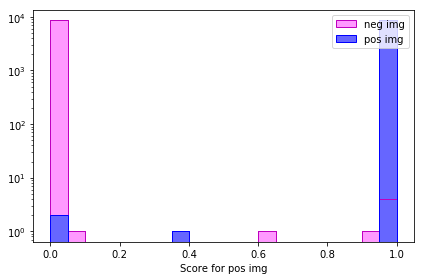

In [76]:
fig, ax = plt.subplots()

binsize = 0.05

bins = np.arange(0, 1 + binsize, binsize)

ax.hist(score_neg, bins=bins, histtype='stepfilled', linewidth=1, edgecolor='m', color='#ff99ff', label='neg img')
ax.hist(score_pos, bins=bins, histtype='stepfilled', linewidth=1, edgecolor='b', color='#6666ff', label='pos img')

ax.hist(score_neg, bins=bins, histtype='step', linewidth=1, linestyle='-', edgecolor='m')
ax.hist(score_pos, bins=bins, histtype='step', linewidth=1, linestyle='-',edgecolor='b')

ax.set_xlabel("Score for pos img")
ax.set_yscale('log')

ax.legend(loc='best')

plt.tight_layout()
plt.savefig('../Data/2017-09-11/167_165_163_200_selu_100epochs/ScoreDistributionOnAllData_{}.png'.format(binsize))

In [77]:
# positive images below 0.5
img_pos = X_all_norm[label_pos == 1]
img_pos_false = img_pos[score_pos < 0.5]
score_pos_false = score_pos[score_pos < 0.5]
print(img_pos_false.shape)

# negative images over 0.5
img_neg = X_all_norm[label_pos == 0]
img_neg_false = img_neg[score_neg > 0.5]
score_neg_false = score_neg[score_neg > 0.5]
print(img_neg_false.shape)

(3, 75, 100)
(6, 75, 100)


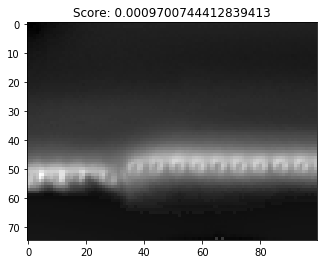

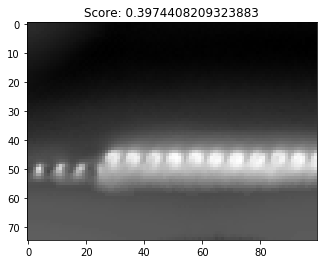

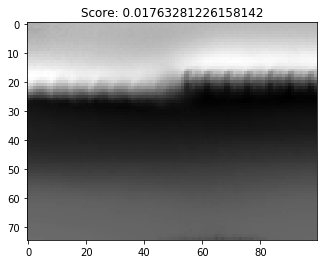

In [78]:
## wrongly classified pics:

for i, (pic,p) in enumerate(zip(img_pos_false[:], score_pos_false[:])):
    plt.imshow(np.squeeze(pic), cmap='gray')
    
    plt.title('Score: {:}'.format(p))
    plt.savefig('../Data/2017-09-11/167_165_163_200_selu_100epochs/wrongImg/pos_{}.png'.format(i))
    plt.show()

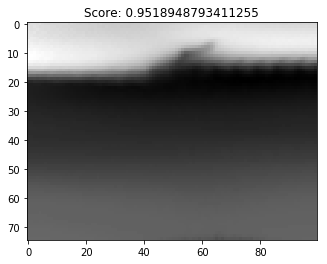

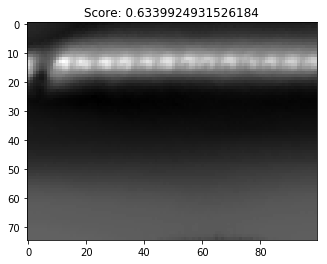

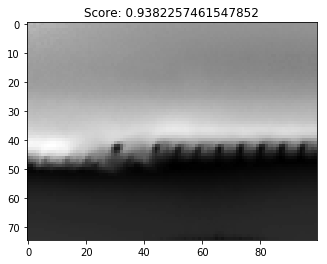

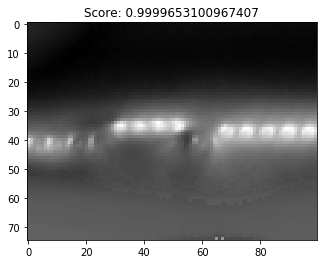

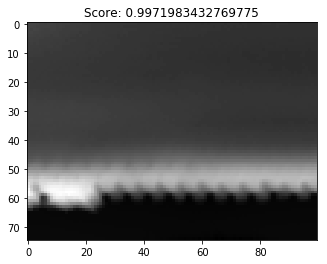

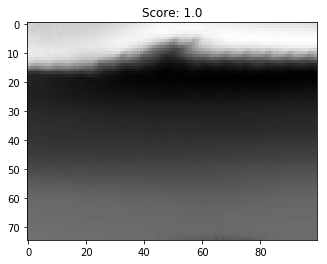

In [79]:
## wrongly classified pics:

for i, (pic,p) in enumerate(zip(img_neg_false[:], score_neg_false[:])):
    plt.imshow(np.squeeze(pic), cmap='gray')
    
    plt.title('Score: {:}'.format(p))
    plt.savefig('../Data/2017-09-11/167_165_163_200_selu_100epochs/wrongImg/neg_{}.png'.format(i))
    plt.show()
    

### ROC Curve

In [82]:
names

['169_167_163_200_200_selu_100epochs',
 '167_165_163_200_200_selu_100epochs',
 '169_167_200_200_selu_100epochs_retrained',
 '167_163_200_200_selu_100epochs_retrained',
 '167_165_163_200_selu_100epochs']

AUC: 0.9996768923444295
AUC: 0.9998190561892771
AUC: 0.9997713113632145
AUC: 0.999826598055784
AUC: 0.9999402410415772


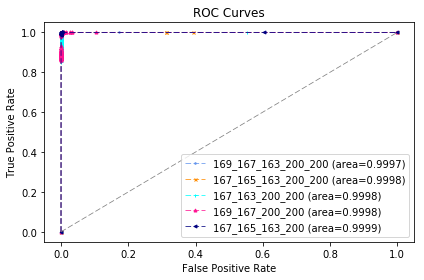

In [119]:
fig, ax = plt.subplots()

colors = ['cornflowerblue', 'darkorange', 'aqua', 'deeppink', 'navy']
marker = ['.', 'x', '+', '^', '<']

for i, (n, n_s) in enumerate(zip(names, names_short)):
        
    if i <= 1:
        Y_all, probs = np.genfromtxt('../Data/2017-09-10/' + n + '/ScoresOnAllData.txt', unpack=True)
    elif i==4:
        Y_all, probs = np.genfromtxt('../Data/2017-09-11/' + n + '/ScoresOnAllData.txt', unpack=True)
    else:
        Y_all, probs = np.genfromtxt('../Data/2017-09-09/' + n + '/ScoresOnAllData.txt', unpack=True)
    
    auc = roc_auc_score(Y_all, probs)
    print('AUC: {}'.format(auc))
    
    fpr, tpr, thresholds = roc_curve(Y_all, probs)

    ax.plot(fpr, tpr, color=colors[i], marker=marker[i], markersize=3, ls='--', lw=0.75, label='{} (area={:.4f})'.format(n_s,auc))


ax.plot([0,1], [0,1], color = 'C7', ls='--',lw=0.75)
    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

#ax.set_xlim([-0.,0.003])
#ax.set_ylim([0.8, 1.01])

ax.set_title('ROC Curves')

ax.legend(loc='best')

plt.tight_layout()

plt.savefig('../Data/Misc/ROC_Curves.pdf')

In [10]:
Y_all, probs = np.genfromtxt('../Data/2017-09-10/169_167_163_200_200_selu_100epochs/ScoresOnAllData.txt', unpack=True)

In [93]:
auc = roc_auc_score(Y_all, probs)
print('AUC: {}'.format(auc))

AUC: 0.9996768923444295


In [94]:
fpr, tpr, thresholds = roc_curve(Y_all, probs)

In [95]:
thresholds.shape

(93,)

In [96]:
fpr.shape

(93,)

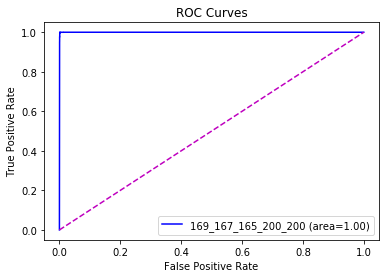

In [118]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr, color = 'b', marker = '', ls='-', label='169_167_165_200_200 (area={:.2f})'.format(auc))
ax.plot([0,1], [0,1], color = 'm', ls='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.set_title('ROC Curves')

ax.legend(loc='best')

# Loss and Accuracy during training

In [222]:
accuracy, losses = np.genfromtxt('../TrainedModels/2017-09-09/169_167_200_200_selu_100epochs_retrained_TrainingData.txt', unpack=True)

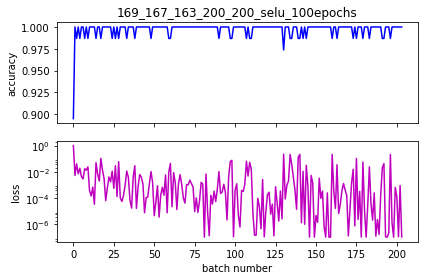

In [226]:
accuracy = np.array(accuracy)
losses = np.array(losses)

fig, ax = plt.subplots(2, sharex=True)

every_item = 100

ax[0].plot(accuracy[::every_item], color = 'b', marker='', ls='-')
ax[1].plot(losses[::every_item], color = 'm', marker='', ls='-')

ax[1].set_xlabel('batch number')
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel('loss')

ax[1].set_yscale('log')

ax[0].set_title('169_167_163_200_200_selu_100epochs')

plt.tight_layout()
plt.savefig('../Data/2017-09-09/169_167_200_200_selu_100epochs_retrained/LossAccLog::{}.png'.format(every_item))

# Score distribution for models - live testing

### Static image (no winding)

In [58]:
score_statimg = np.genfromtxt('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/Probs/WindingProb_2017-09-11_08-08-43_static_image.txt', unpack=True)

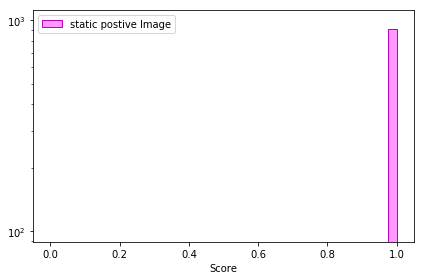

In [64]:
fig, ax = plt.subplots()

binsize = 0.025

bins = np.arange(0, 1 + binsize, binsize)

ax.hist(score_statimg, bins=bins, histtype='stepfilled', linewidth=1, edgecolor='m', color='#ff99ff', label='static postive Image')

ax.set_xlabel("Score")
ax.set_yscale('log')

ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/ScoreDistributionStaticImage_{}.png'.format(binsize))

### winding image (positive)

In [74]:
score_wind1_pos = np.genfromtxt('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/Probs/WindingProb_2017-09-11_10-03-45.txt')
score_wind2_pos = np.genfromtxt('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/Probs/WindingProb_2017-09-11_10-05-44.txt')
score_wind3_pos = np.genfromtxt('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/Probs/WindingProb_2017-09-11_10-37-26.txt')

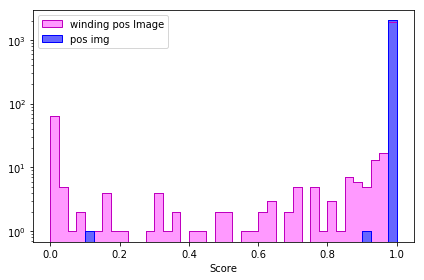

In [76]:
fig, ax = plt.subplots()

binsize = 0.025

bins = np.arange(0, 1 + binsize, binsize)

ax.hist(score_wind1_pos, bins=bins, histtype='stepfilled', linewidth=1, edgecolor='m', color='#ff99ff', label='winding pos Image')
ax.hist(score_wind2_pos, bins=bins, histtype='stepfilled', linewidth=1, edgecolor='b', color='#6666ff', label='pos img')

ax.hist(score_wind1_pos, bins=bins, histtype='step', linewidth=1, linestyle='-', edgecolor='m')
ax.hist(score_wind2_pos, bins=bins, histtype='step', linewidth=1, linestyle='-',edgecolor='b')

ax.set_xlabel("Score")
ax.set_yscale('log')

ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('../Data/2017-09-10/167_165_163_200_200_selu_100epochs/ScoreDistributionWindingPosImage_{}.png'.format(binsize))

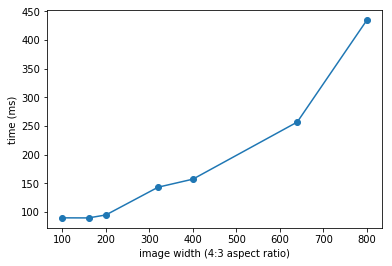

In [6]:
plt.plotfile('totaltime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

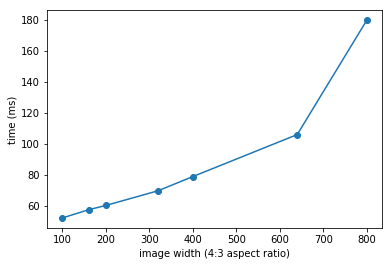

In [7]:
plt.plotfile('resizetime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

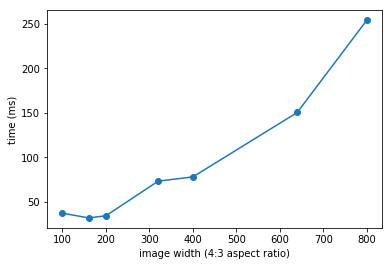

In [8]:
plt.plotfile('classtime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

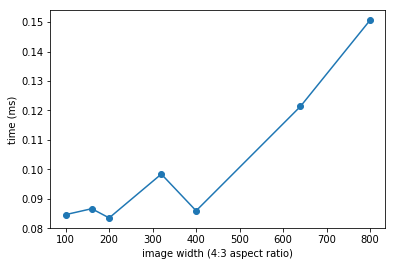

In [9]:
plt.plotfile('formattime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

0.962794959545
[  4.94065646e-324   1.88421011e-002   1.39923990e-002 ...,
   2.17805922e-004   2.20752365e-004   2.19703114e-004]
1238


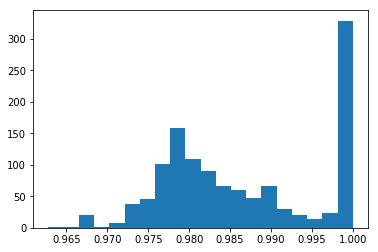

In [18]:
col1, col2 = np.genfromtxt('histstill.dat', unpack=True, dtype=np.float)

print(np.min(col1[1:]))
print(col2)
print(len(col2))
fig, ax = plt.subplots()

ax.hist(col1[1:], bins=20)
#ax.hist(col2)
plt.show()



(600, 800)


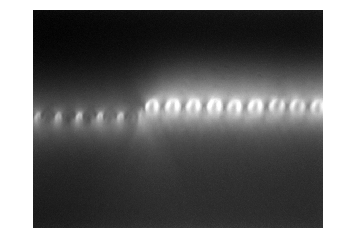

In [16]:
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/SciFi-CAIR2/Images_Jul_2017/Grey_800x600/PosTrain/IMG11931.bmp'))
#img = scipy.misc.imresize(img, (75,100))
#img = scipy.ndimage.interpolation.shift(img, (25,0), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)
print(img.shape)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.savefig('../Data/600_800_pos.png')
plt.show()

In [23]:
for width in range(40, 800+20, 20):
    height = 0.75*width
    if height%0.75 == 0:
        img2 = scipy.misc.imresize(img, (int(height), int(width)))
        plt.imshow(img2, cmap='gray')
        plt.savefig('../Data/{:d}_{:d}_pos.png'.format(int(height), int(width)))

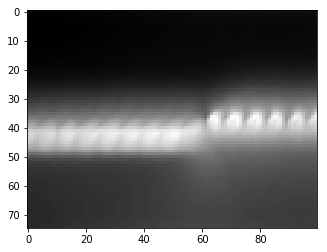

In [10]:
img2 = scipy.misc.imresize(img, (75,100))
#img2 = scipy.ndimage.interpolation.shift(img, (0,200), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)

plt.imshow(img2, cmap='gray')
plt.show()

In [1]:
from datetime import datetime

In [10]:
str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

'2017-08-22_10-12-53'